## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [1]:
!pip install category_encoders

In [27]:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

Read in the telecom churn dataset.

https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv

In [3]:
# answer here
tele_df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv')

tele_df.info()
tele_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [4]:
tele_df['Churn'] = tele_df['Churn'].replace({'Yes': 1, 'No':0})
tele_df.dropna(inplace=True)

In [5]:
# answer goes here
tele_df.select_dtypes(include='O').nunique()

ServiceArea                743
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

In [6]:
for col in tele_df.select_dtypes(include='O').columns:
  print(f'\n{col} value counts:')
  print(tele_df[col].value_counts(dropna=False))


ServiceArea value counts:
NYCBRO917    1646
DALDAL214    1479
HOUHOU281    1471
NYCMAN917    1156
DALFTW817     771
             ... 
APCLXT240       1
KCYHES316       1
NCRLUM910       1
SFRFAI707       1
OHIBCY419       1
Name: ServiceArea, Length: 743, dtype: int64

ChildrenInHH value counts:
No     37483
Yes    12269
Name: ChildrenInHH, dtype: int64

HandsetRefurbished value counts:
No     42852
Yes     6900
Name: HandsetRefurbished, dtype: int64

HandsetWebCapable value counts:
Yes    44905
No      4847
Name: HandsetWebCapable, dtype: int64

TruckOwner value counts:
No     40280
Yes     9472
Name: TruckOwner, dtype: int64

RVOwner value counts:
No     45619
Yes     4133
Name: RVOwner, dtype: int64

Homeownership value counts:
Known      33725
Unknown    16027
Name: Homeownership, dtype: int64

BuysViaMailOrder value counts:
No     31432
Yes    18320
Name: BuysViaMailOrder, dtype: int64

RespondsToMailOffers value counts:
No     30667
Yes    19085
Name: RespondsToMailOffers, dtype

In [7]:
np.abs(tele_df.corr()['Churn']).sort_values(ascending=False)

Churn                        1.000000
CurrentEquipmentDays         0.102513
TotalRecurringCharge         0.058945
RetentionCalls               0.058422
MonthlyMinutes               0.050165
OffPeakCallsInOut            0.040955
HandsetModels                0.040470
CustomerID                   0.040186
PeakCallsInOut               0.039527
ReceivedCalls                0.037097
CustomerCareCalls            0.035331
RetentionOffersAccepted      0.034511
InboundCalls                 0.033855
Handsets                     0.033730
PercChangeMinutes            0.033194
UniqueSubs                   0.032839
OutboundCalls                0.032489
AgeHH1                       0.028761
UnansweredCalls              0.028192
CallWaitingCalls             0.025509
ThreewayCalls                0.023716
DirectorAssistedCalls        0.019714
AgeHH2                       0.017577
MonthsInService              0.017544
AdjustmentsToCreditRating    0.016123
OverageMinutes               0.015301
DroppedCalls

In [21]:
tele_df.select_dtypes(include='number').nunique()

CustomerID                   49752
Churn                            2
MonthlyRevenue               12504
MonthlyMinutes                2706
TotalRecurringCharge           211
DirectorAssistedCalls          143
OverageMinutes                 739
RoamingCalls                   522
PercChangeMinutes             2236
PercChangeRevenues            2872
DroppedCalls                   283
BlockedCalls                   369
UnansweredCalls                832
CustomerCareCalls              183
ThreewayCalls                   78
ReceivedCalls                 6061
OutboundCalls                  778
InboundCalls                   465
PeakCallsInOut                1824
OffPeakCallsInOut             1657
DroppedBlockedCalls            443
CallForwardingCalls             30
CallWaitingCalls               221
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      10
Handsets                        23
HandsetModels                   13
CurrentEquipmentDays

In [26]:
Y = tele_df['Churn']
X = tele_df.select_dtypes(include='number').drop(['Churn'], 1)
best = SelectKBest(score_func=f_classif, k=11)
X_best = best.fit_transform(X, Y)
X_best = pd.DataFrame(X_best, columns=X.columns[best.get_support()])
X_best.columns

Index(['CustomerID', 'MonthlyMinutes', 'TotalRecurringCharge',
       'CustomerCareCalls', 'ReceivedCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'HandsetModels', 'CurrentEquipmentDays',
       'RetentionCalls', 'RetentionOffersAccepted'],
      dtype='object')

In [9]:
feature_list = ['CreditRating', 'HasCreditCard', 'MonthlyMinutes', 'TotalRecurringCharge',
       'CustomerCareCalls', 'ReceivedCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'HandsetModels', 'CurrentEquipmentDays',
       'RetentionCalls', 'RetentionOffersAccepted']

In [78]:
tele_df['Churn'].value_counts()

0    35507
1    14245
Name: Churn, dtype: int64

Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [68]:
# answer goes here
X = tele_df[feature_list]
Y = tele_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [69]:
encoder = ce.LeaveOneOutEncoder(cols=['CreditRating', 'HasCreditCard'])
encoder.fit(X_train, y_train)
X_train_cleaned = encoder.transform(X_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [70]:
X_train_cleaned

,CreditRating,HasCreditCard,MonthlyMinutes,TotalRecurringCharge,CustomerCareCalls,ReceivedCalls,PeakCallsInOut,OffPeakCallsInOut,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted
40731,0.303199,0.285730,609.0,45.0,0.0,48.8,88.0,113.3,1.0,375.0,0,0
50155,0.306033,0.291583,399.0,50.0,1.7,131.8,123.3,61.7,1.0,635.0,0,0
44352,0.259454,0.285730,2091.0,70.0,2.0,1098.1,240.0,656.0,2.0,150.0,0,0
9246,0.311759,0.285730,436.0,50.0,0.0,19.1,94.0,22.0,1.0,697.0,0,0
9776,0.303199,0.285730,147.0,30.0,0.0,32.4,61.7,14.3,1.0,749.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30833,0.306033,0.285730,0.0,40.0,0.0,0.0,0.0,0.0,2.0,221.0,0,0
37622,0.306033,0.285730,722.0,45.0,0.7,201.9,77.0,240.0,2.0,137.0,0,0
6593,0.311759,0.285730,740.0,53.0,13.7,95.8,46.7,59.3,1.0,856.0,0,0
1166,0.311759,0.285730,504.0,71.0,4.0,103.7,133.7,55.0,5.0,49.0,0,0


Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [71]:
# answer goes here
forest = RandomForestClassifier()

forest.fit(X_train_cleaned, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [72]:
# answer goes here
X_test_cleaned = encoder.transform(X_test)

y_preds = forest.predict(X_test_cleaned)

In [80]:
X_test_cleaned

,CreditRating,HasCreditCard,MonthlyMinutes,TotalRecurringCharge,CustomerCareCalls,ReceivedCalls,PeakCallsInOut,OffPeakCallsInOut,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted
3374,0.311759,0.285730,1014.0,60.0,0.0,107.7,155.0,108.3,5.0,35.0,1,1
13363,0.303199,0.285730,1260.0,75.0,8.0,453.9,391.7,224.3,2.0,562.0,0,0
24878,0.303199,0.285730,25.0,30.0,0.0,4.9,2.0,0.3,1.0,399.0,0,0
22172,0.303199,0.285730,389.0,30.0,0.0,56.3,101.3,70.0,1.0,452.0,0,0
42655,0.214428,0.291583,378.0,40.0,2.3,34.7,60.7,104.7,1.0,195.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40224,0.264748,0.285730,112.0,36.0,0.0,26.4,42.3,15.7,1.0,317.0,0,0
21227,0.303199,0.285730,1645.0,30.0,0.7,242.6,190.0,90.0,1.0,470.0,0,0
37384,0.259454,0.291583,294.0,45.0,0.0,44.1,41.3,52.7,1.0,225.0,0,0
34930,0.259454,0.291583,776.0,40.0,0.0,0.0,0.0,0.0,1.0,429.0,0,0


After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

In [73]:
# answer goes here
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7151
           1       0.48      0.10      0.17      2800

    accuracy                           0.72      9951
   macro avg       0.61      0.53      0.50      9951
weighted avg       0.66      0.72      0.64      9951



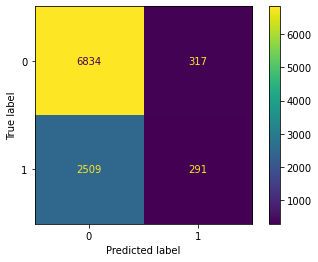

In [74]:
plot_confusion_matrix(forest, X_test_cleaned, y_test, values_format='.5g')
plt.show()

In [75]:
train_score = forest.score(X_train_cleaned, y_train)
test_score = forest.score(X_test_cleaned, y_test)
print('Train Score: {:.4f}'.format(train_score))
print('Test Score: {:.4f}'.format(test_score))

Train Score: 1.0000
Test Score: 0.7160


In [76]:
probs = forest.predict_proba(X_test_cleaned)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

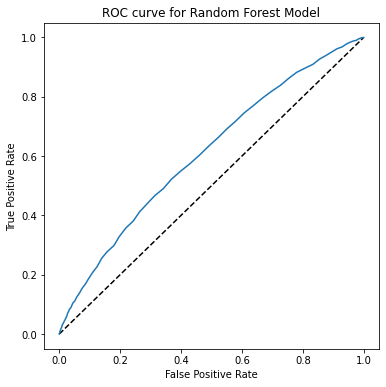

In [77]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Model')
plt.show()

Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

In [79]:
# answer goes here
forest_importance = pd.Series(forest.feature_importances_, index=X_train_cleaned.columns).sort_values(ascending=False)
forest_importance

CurrentEquipmentDays       0.185323
MonthlyMinutes             0.164535
PeakCallsInOut             0.135989
ReceivedCalls              0.133059
OffPeakCallsInOut          0.132042
TotalRecurringCharge       0.092801
CustomerCareCalls          0.057831
CreditRating               0.045749
HandsetModels              0.027425
HasCreditCard              0.017339
RetentionCalls             0.005987
RetentionOffersAccepted    0.001920
dtype: float64